In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score

In [3]:
file_path = 'Age_Prediction.csv'  
try:
    df = pd.read_csv(file_path)
    print("dataset loaded")
except FileNotFoundError:
    print("error:file not found")

dataset loaded


In [4]:
print(df.head())

      ID Age_group  Age  Gender  PAQ605  Body Mass Index  \
0  73564     Adult   61       2       2             35.7   
1  73568     Adult   26       2       2             20.3   
2  73576     Adult   16       1       2             23.2   
3  73577     Adult   32       1       2             28.9   
4  73580     Adult   38       2       1             35.9   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                          110                2                150   
1                           89                2                 80   
2                           89                2                 68   
3                          104                2                 84   
4                          103                2                 81   

   Blood Insulin Levels  
0                 14.91  
1                  3.85  
2                  6.14  
3                 16.15  
4                 10.92  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2278 non-null   int64  
 1   Age_group                    2278 non-null   object 
 2   Age                          2278 non-null   int64  
 3   Gender                       2278 non-null   int64  
 4   PAQ605                       2278 non-null   int64  
 5   Body Mass Index              2278 non-null   float64
 6   Blood Glucose after fasting  2278 non-null   int64  
 7   Diabetic or not              2278 non-null   int64  
 8   Respondent's Oral            2278 non-null   int64  
 9   Blood Insulin Levels         2278 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 178.1+ KB


In [6]:
print("\nmissing values:")
print(df.isnull().sum())


missing values:
ID                             0
Age_group                      0
Age                            0
Gender                         0
PAQ605                         0
Body Mass Index                0
Blood Glucose after fasting    0
Diabetic or not                0
Respondent's Oral              0
Blood Insulin Levels           0
dtype: int64


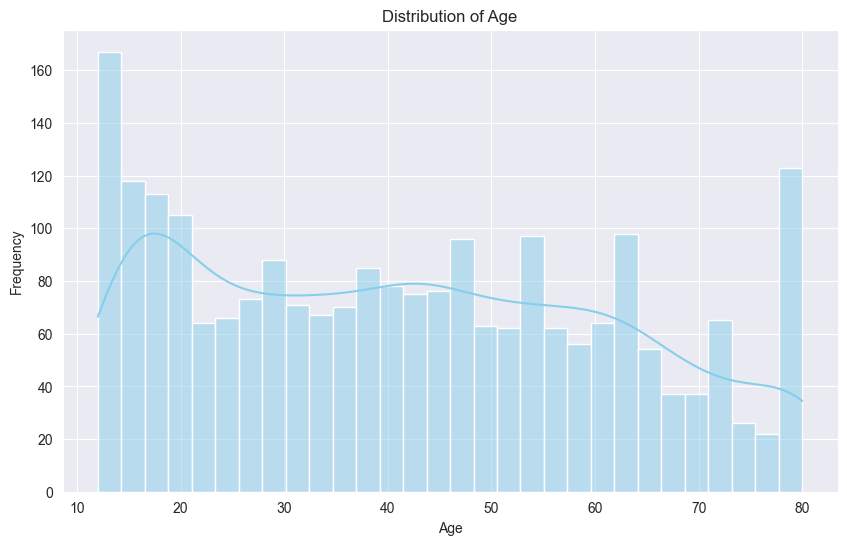

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

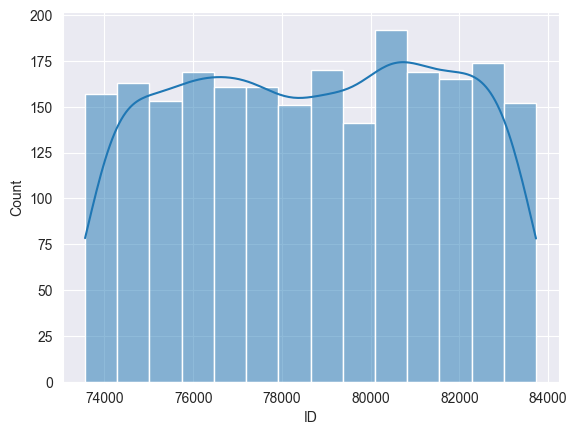

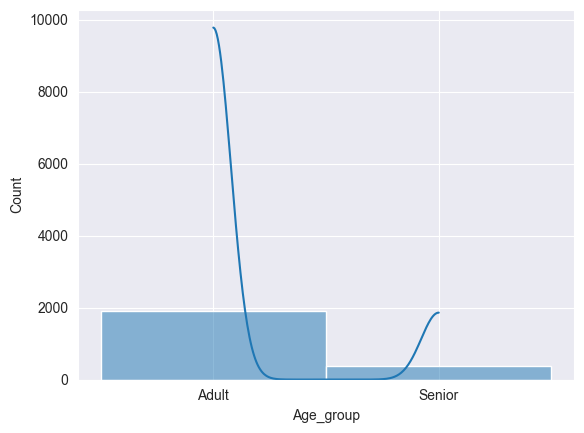

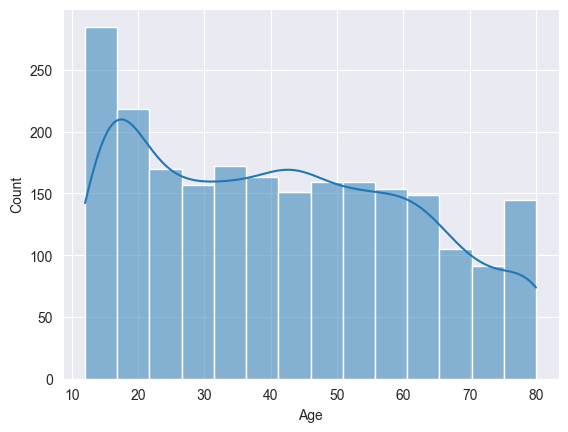

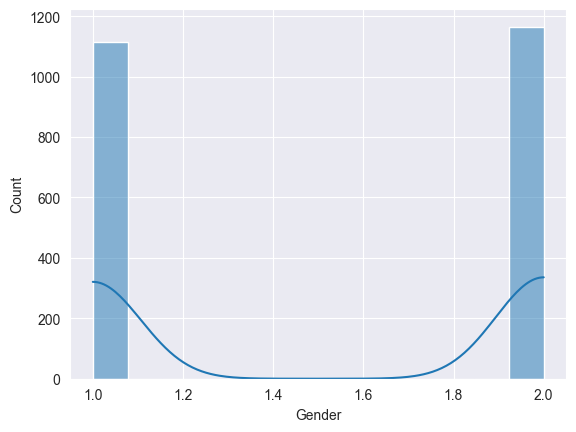

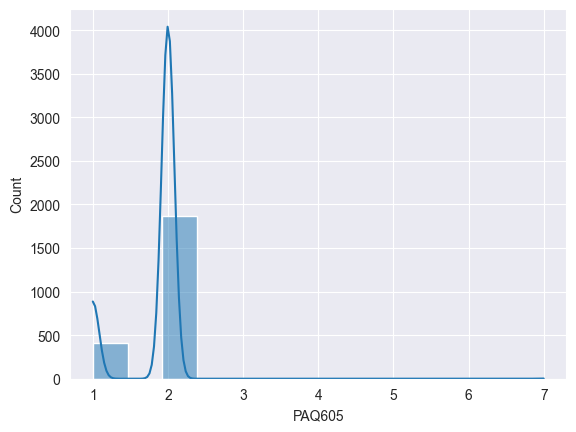

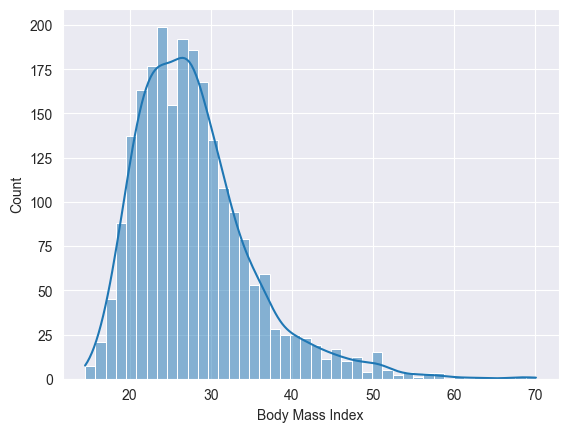

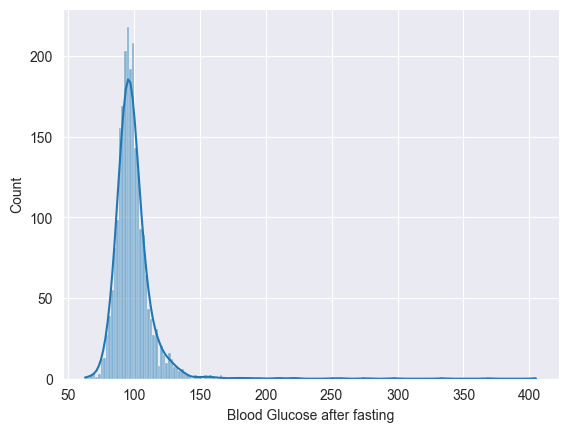

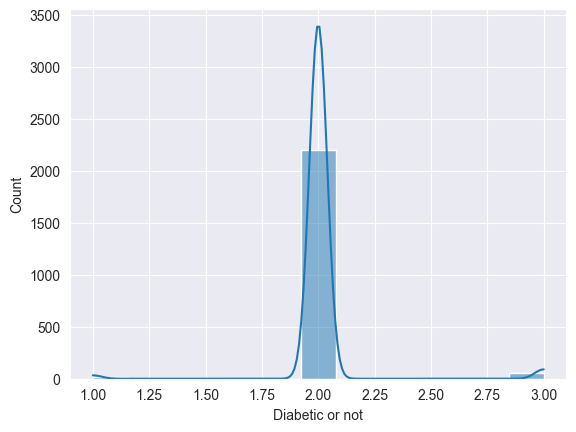

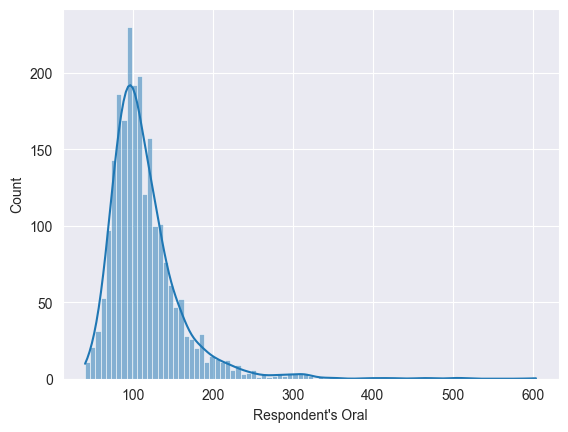

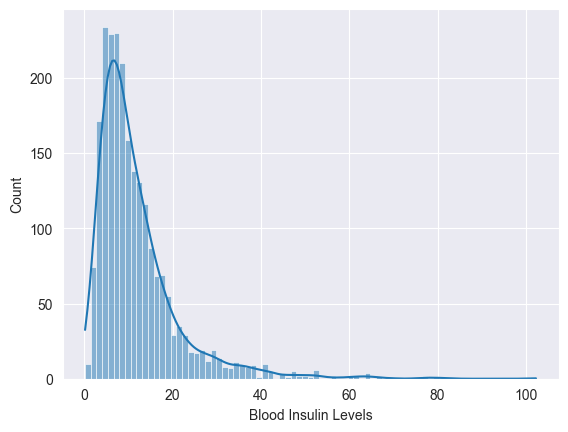

In [8]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

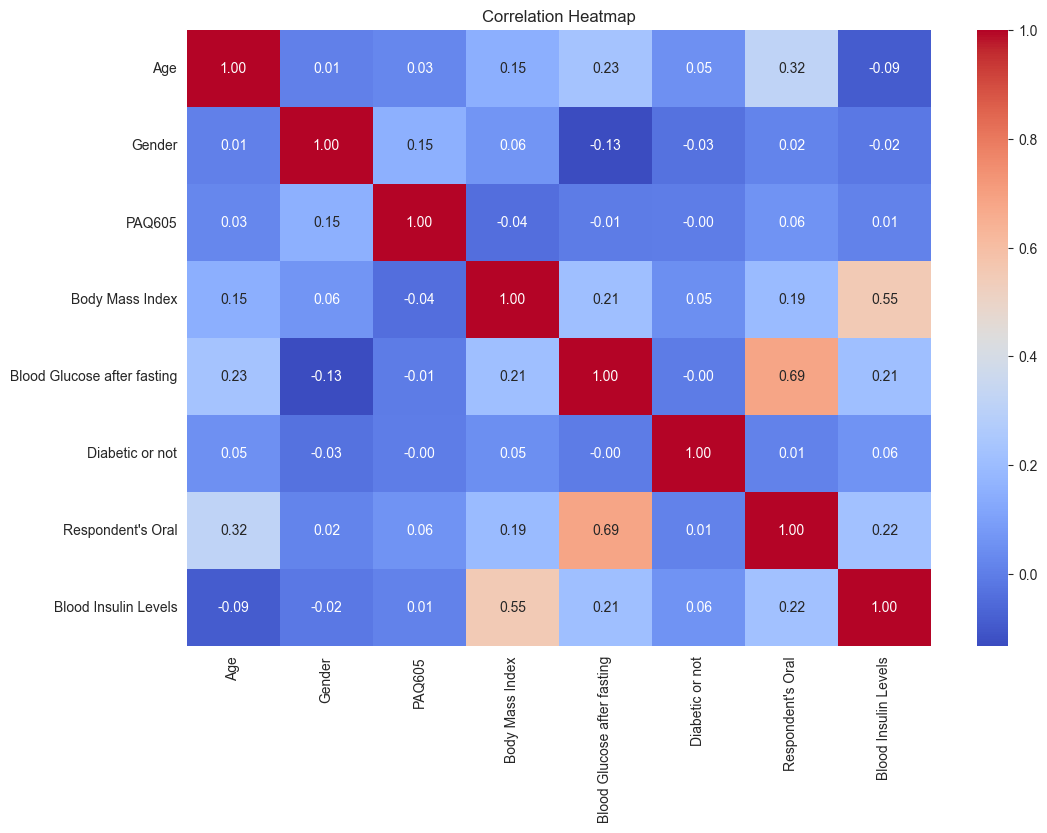

In [38]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
X = df.drop("Age", axis=1)
y = df["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")


Model Performance:
Mean Absolute Error (MAE): 9.615065789473682


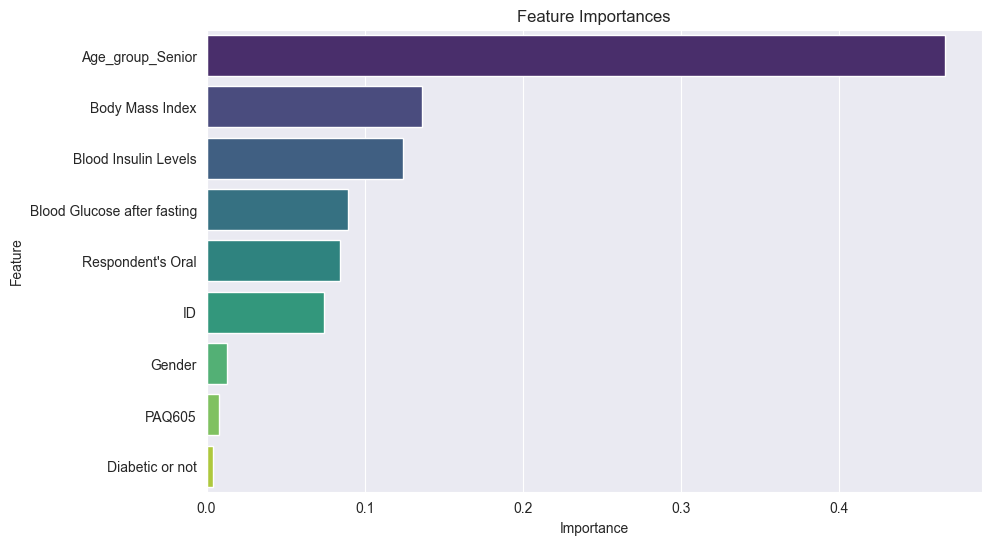

In [14]:
feature_importances = pd.DataFrame({
    'Feature': df.drop("Age", axis=1).columns,
    'Importance': model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importances")
plt.show()

In [17]:

def predict_age(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df, drop_first=True)
    
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    

    input_df = input_df[X.columns]
    

    input_scaled = scaler.transform(input_df)
    

    predicted_age = model.predict(input_scaled)
    
    return predicted_age[0]


input_data = { 
    'Gender': 1,  
    'PAQ605': 2,  
    'Body mass index':24.6,
    'Blood Glucose after fasting':100,
    'Diabetic or not':2,
    "Respondent's Oral":97,
    'Blood Insulin Level':4.33
}

predicted_age = predict_age(input_data)
print(f"Przewidywany wiek: {predicted_age}")


Przewidywany wiek: 38.57
